## Bagged Trees
### Optimal Number of Trees: 50 

In [1]:
from sklearn.ensemble import BaggingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import math

# Import and read data
df=pd.read_csv(r'/Users/Melanie/Downloads/QSARRegressionDataFinal.csv')

train= df[df['Set']=='Train']
test= df[df['Set']=='Test']

x_train= train[train.columns[5:27]]
y_train=train.loc[:,'logBCF']

x_test= test[test.columns[5:27]]
y_test=test.loc[:,'logBCF']

x=df[test.columns[5:27]]
y= df.loc[:, 'logBCF']


In [2]:
# Tests the number of trees used from 10 to 150 incrementing by 5 
estimator_range= [1]+ list(range(10,110, 5))
scores=[]

for e in estimator_range:
    model= BaggingRegressor(n_estimators=e, random_state=2)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    print("# of Trees:{}  R2: {:3f}".format(e, scores[-1]))


best_score= max(scores)
best_index=(5*scores.index(best_score))+5
print("\nBest score is: {} using {} trees".format(max(scores), best_index))
# x_axis= range(len(estimator_range))
# plt.scatter(x_axis, scores, s=5, label='scores')
# print(max(scores), scores.index(max(scores)))
    

# of Trees:1  R2: 0.651677
# of Trees:10  R2: 0.843085
# of Trees:15  R2: 0.844383
# of Trees:20  R2: 0.847186
# of Trees:25  R2: 0.845783
# of Trees:30  R2: 0.844687
# of Trees:35  R2: 0.847652
# of Trees:40  R2: 0.851958
# of Trees:45  R2: 0.852409
# of Trees:50  R2: 0.852558
# of Trees:55  R2: 0.849703
# of Trees:60  R2: 0.848106
# of Trees:65  R2: 0.848981
# of Trees:70  R2: 0.850451
# of Trees:75  R2: 0.849091
# of Trees:80  R2: 0.847357
# of Trees:85  R2: 0.848234
# of Trees:90  R2: 0.847494
# of Trees:95  R2: 0.848043
# of Trees:100  R2: 0.848281
# of Trees:105  R2: 0.847846

Best score is: 0.8525580664939161 using 50 trees



Prediction using Best Number of Trees



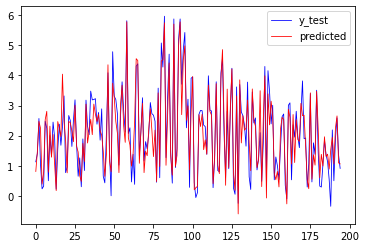

R^2:  0.8525580664939161
Mean Square Error:  0.2865316027299145
Root Mean Square:  0.535286467912196


In [3]:
print("\nPrediction using Best Number of Trees\n")    
model=BaggingRegressor(n_estimators=best_index, random_state=2)
# df.head()

model.fit(x_train, y_train)
y_predict=model.predict(x_test)

# Graph model
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="y_test")
plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Print R2, MSE
score= model.score(x_test, y_test)
# mse= mean_squared_error(y_test, )
mean_sqre= mean_squared_error(y_test, y_predict)
print("R^2: ", score)
print("Mean Square Error: ", mean_sqre)
print("Root Mean Square: ", math.sqrt(mean_sqre))


In [4]:
from sklearn.preprocessing import StandardScaler

# Scale data to improve mean square error
scaler= StandardScaler().fit(x_train)
x_train_s= scaler.transform(x_train)
x_test_s= scaler.transform(x_test)

In [7]:
# Tests the number of trees used from 10 to 150 incrementing by 5 
estimator_range= [1]+ list(range(10,110, 5))
scores=[]
mse=[]
for e in estimator_range:
    model= BaggingRegressor(n_estimators=e, random_state=2)
    model.fit(x_train_s, y_train)
    y_predict= model.predict(x_test_s)
    mean_sqre= mean_squared_error(y_test, y_predict)
    mse.append(mean_sqre)
    scores.append(model.score(x_test_s, y_test))
    print("# of Trees:{}  R2: {:3f} MSE:{:6f}".format(e, scores[-1],mse[-1]))


best_score= max(scores)
best_index=(5*scores.index(best_score))+5
print("\nBest score is: {} using {} trees".format(max(scores), best_index))
print ("Lowest MSE: ",min(mse))
# x_axis= range(len(estimator_range))
# plt.scatter(x_axis, scores, s=5, label='scores')
# print(max(scores), scores.index(max(scores)))
    

# of Trees:1  R2: 0.652188 MSE:0.675921
# of Trees:10  R2: 0.837804 MSE:0.315203
# of Trees:15  R2: 0.841117 MSE:0.308766
# of Trees:20  R2: 0.844504 MSE:0.302183
# of Trees:25  R2: 0.843360 MSE:0.304408
# of Trees:30  R2: 0.842578 MSE:0.305927
# of Trees:35  R2: 0.846340 MSE:0.298616
# of Trees:40  R2: 0.851083 MSE:0.289397
# of Trees:45  R2: 0.851699 MSE:0.288202
# of Trees:50  R2: 0.852160 MSE:0.287305
# of Trees:55  R2: 0.849062 MSE:0.293326
# of Trees:60  R2: 0.847533 MSE:0.296297
# of Trees:65  R2: 0.848524 MSE:0.294371
# of Trees:70  R2: 0.849855 MSE:0.291784
# of Trees:75  R2: 0.848397 MSE:0.294617
# of Trees:80  R2: 0.846656 MSE:0.298002
# of Trees:85  R2: 0.847645 MSE:0.296079
# of Trees:90  R2: 0.847101 MSE:0.297137
# of Trees:95  R2: 0.847589 MSE:0.296188
# of Trees:100  R2: 0.847773 MSE:0.295831
# of Trees:105  R2: 0.847284 MSE:0.296782

Best score is: 0.8521603403572909 using 50 trees
Lowest MSE:  0.2873045246841025


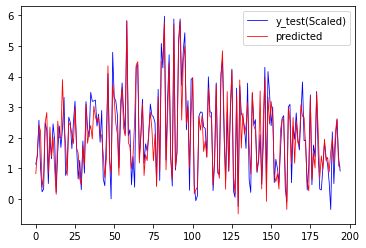

In [9]:
# Graph model
x_ax = range(len(x_test_s))
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="y_test(Scaled)")
plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()